In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("Set2")

data = pd.read_excel(r'Air pollution.xlsx')
data = data.iloc[: , :-2]
data = data[data.year >= 1990]

data["o3.exp"] = float(2.15) * data["o3.exp"]

data['o3.exp'].interpolate(method='cubic', inplace=True) 
data['pm2.5.exp'].interpolate(method='cubic', inplace=True) 
data['pm10.exp'].interpolate(method='cubic', inplace=True) 
data['pm10.exp'][data['pm10.exp'] < 0] = 0 - data['pm10.exp']*0.5

d13=data.groupby(['year'])['o3.exp'].mean().reset_index(name='o3.exp').set_index('year')
d14=data.groupby(['year'])['pm2.5.exp'].mean().reset_index(name='pm2.5.exp').set_index('year')
d15=data.groupby(['year'])['pm10.exp'].mean().reset_index(name='pm10.exp').set_index('year')

D:\programy\Anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


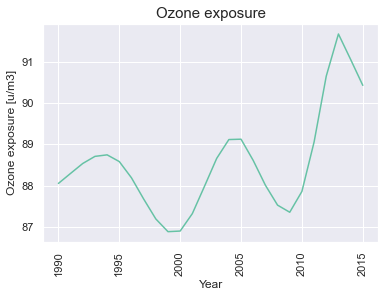

In [3]:
d13['o3.exp'].plot()
plt.xticks(rotation=90)
plt.title(f"Ozone exposure", size=15)
plt.xlabel('Year')
plt.ylabel('Ozone exposure [u/m3]')
plt.show()

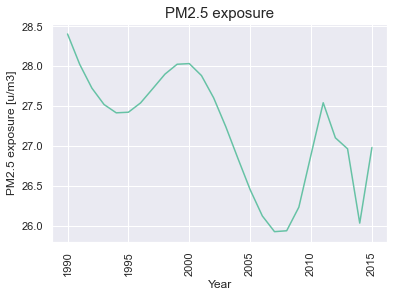

In [4]:
d14['pm2.5.exp'].plot()
plt.xticks(rotation=90)
plt.title(f"PM2.5 exposure", size=15)
plt.xlabel('Year')
plt.ylabel('PM2.5 exposure [u/m3]')
plt.show()

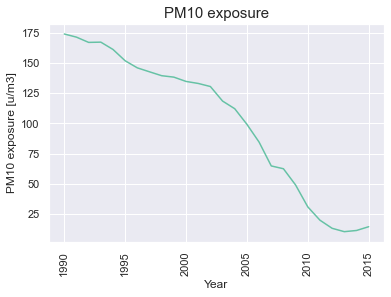

In [5]:
d15['pm10.exp'].plot()
plt.xticks(rotation=90)
plt.title(f"PM10 exposure", size=15)
plt.xlabel('Year')
plt.ylabel('PM10 exposure [u/m3]')
plt.show()

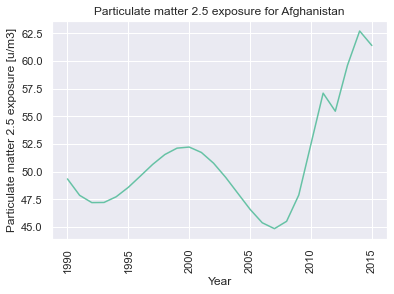

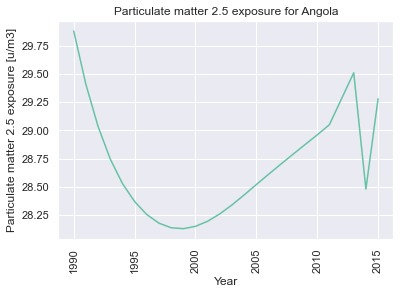

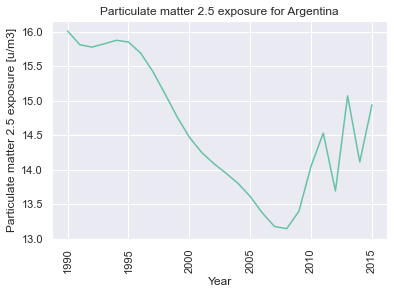

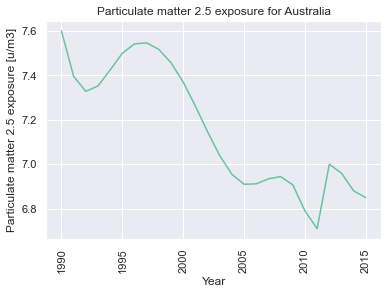

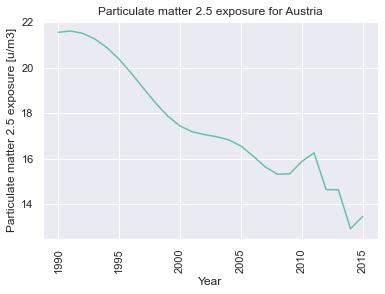

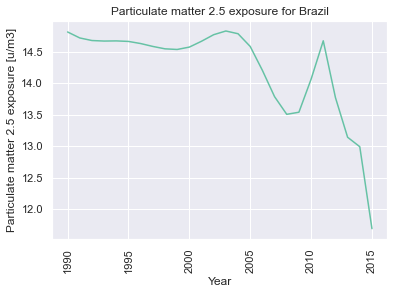

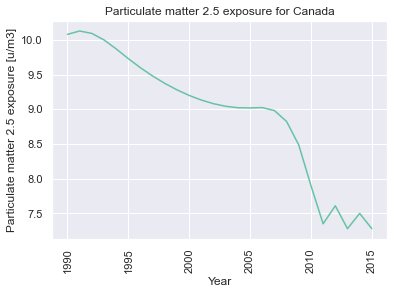

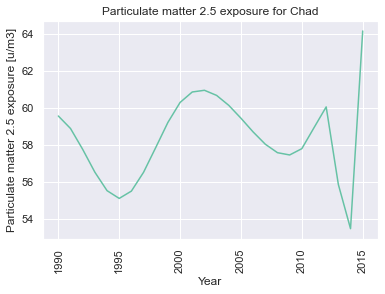

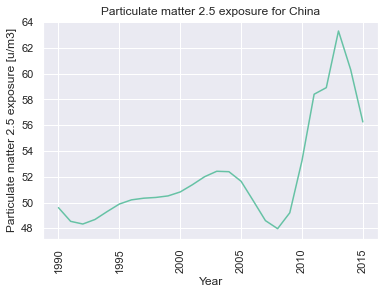

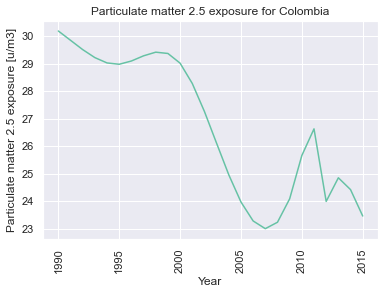

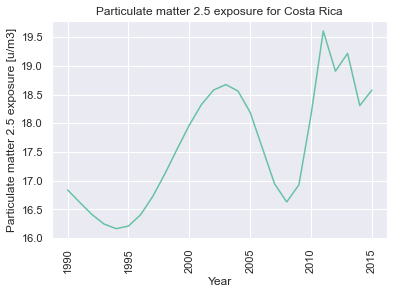

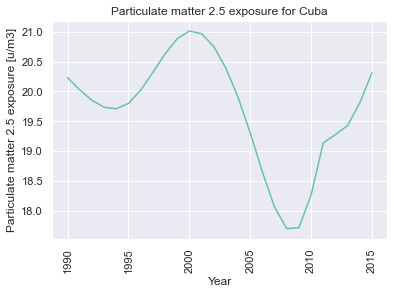

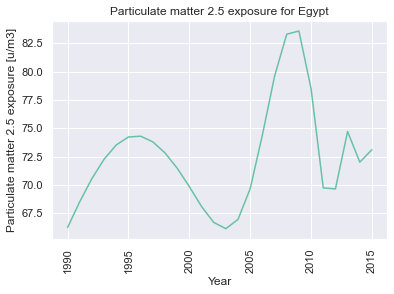

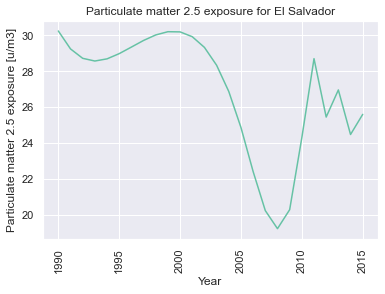

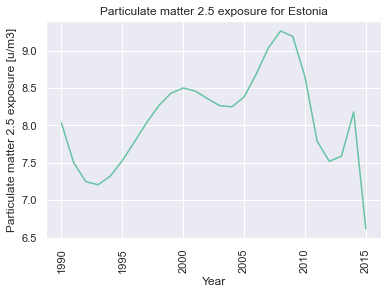

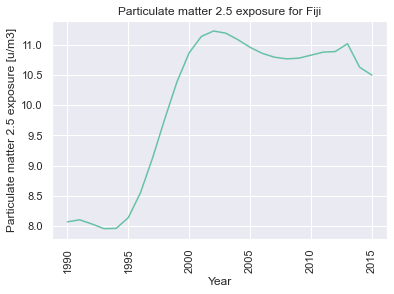

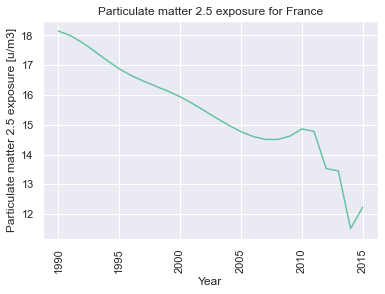

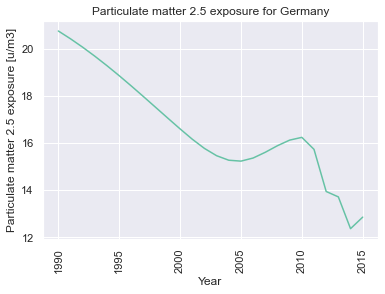

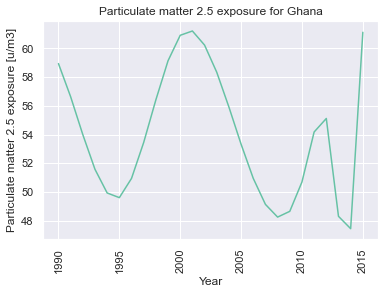

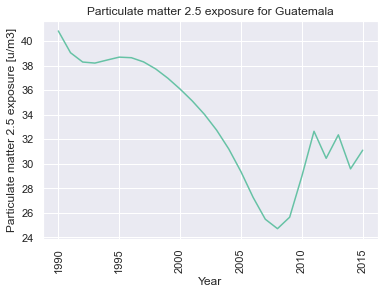

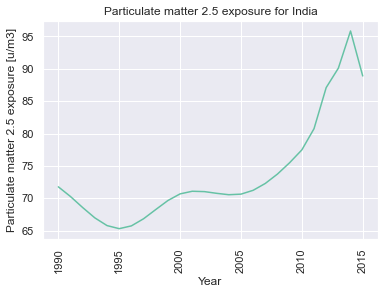

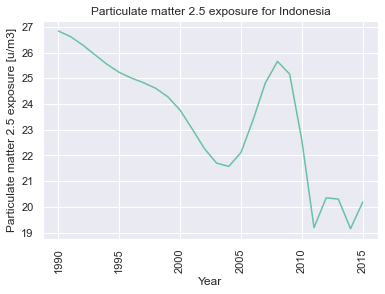

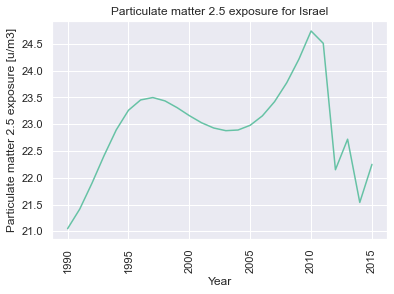

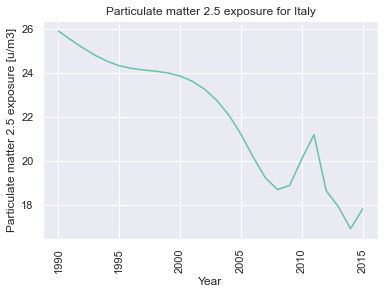

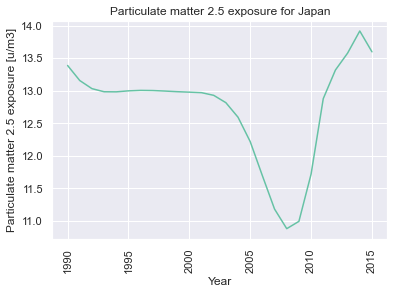

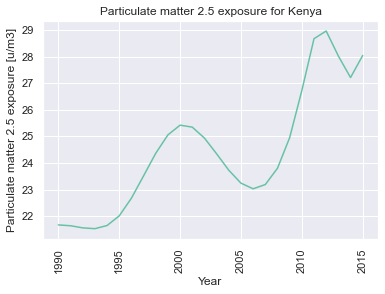

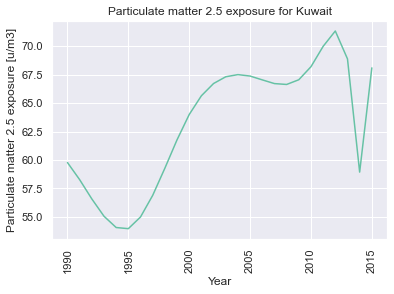

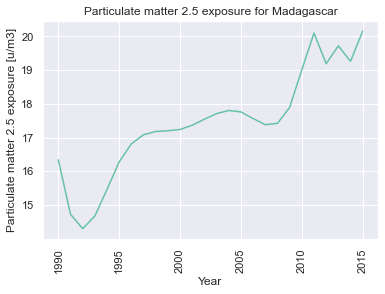

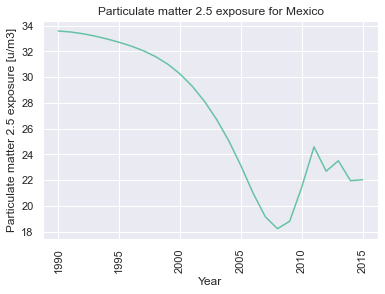

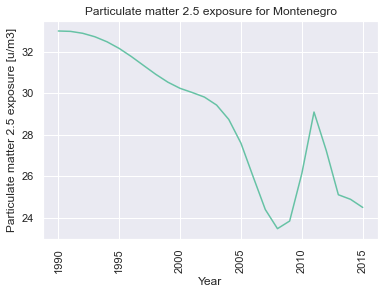

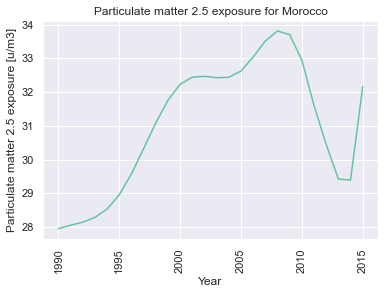

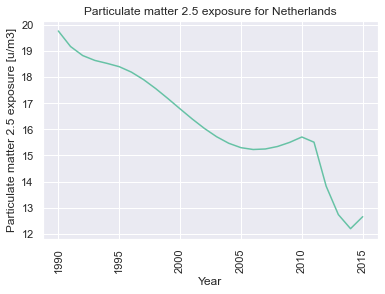

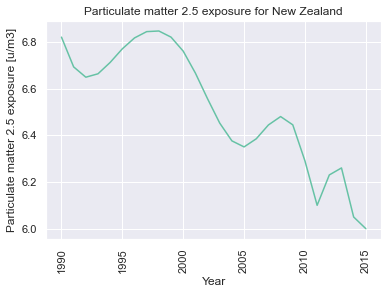

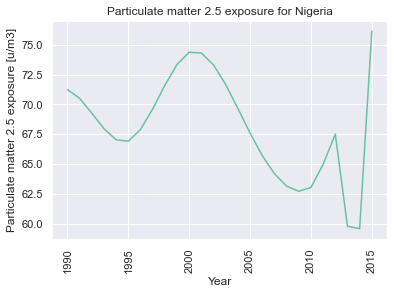

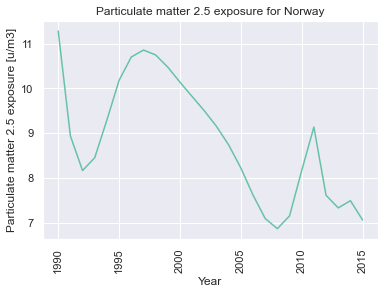

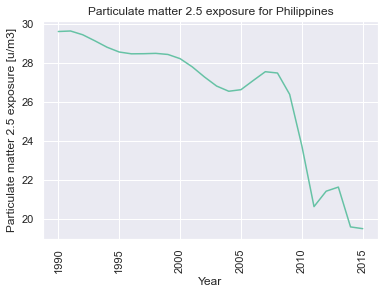

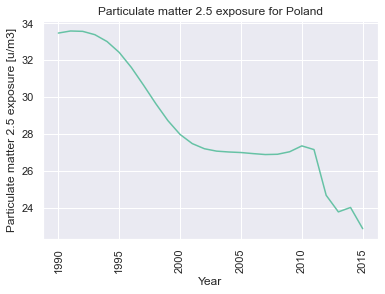

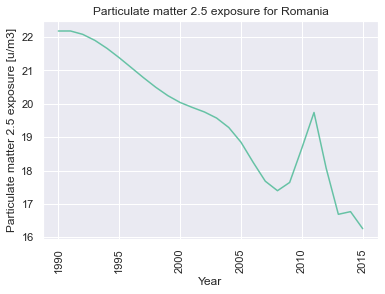

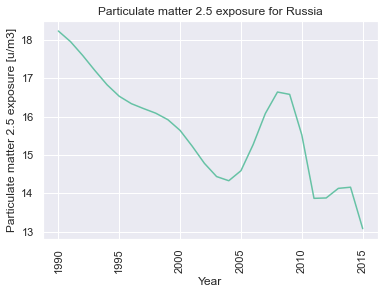

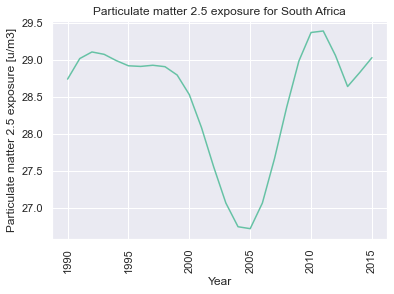

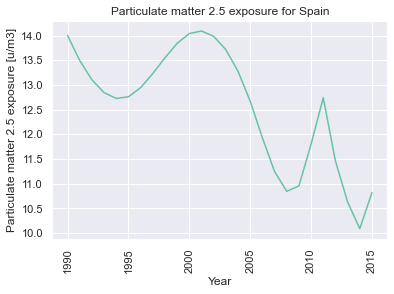

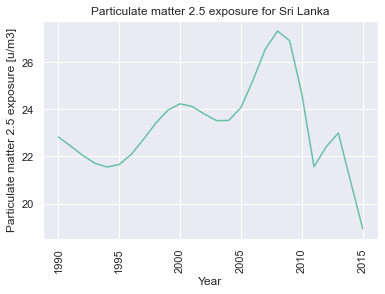

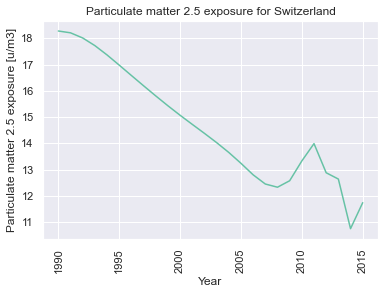

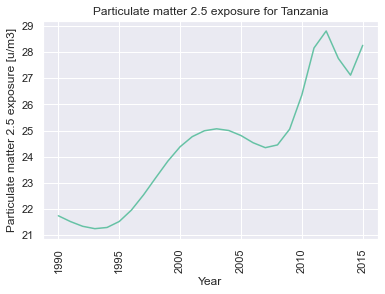

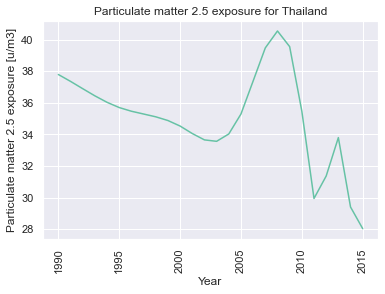

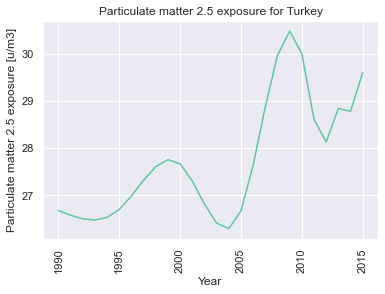

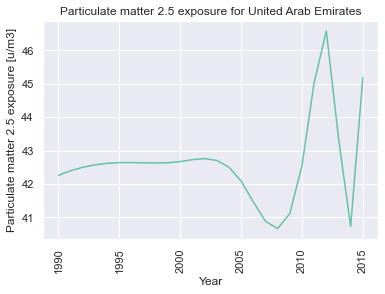

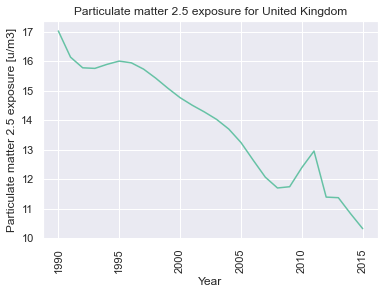

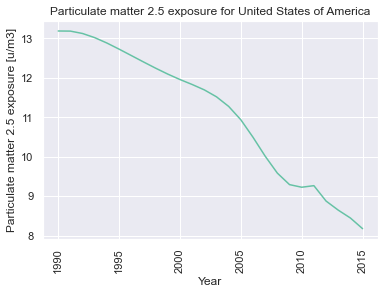

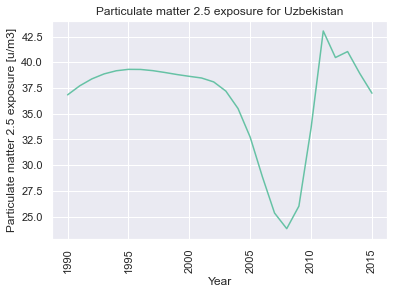

In [6]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['pm2.5.exp'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Particulate matter 2.5 exposure for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Particulate matter 2.5 exposure [u/m3]')
    #plt.legend()
    plt.show()

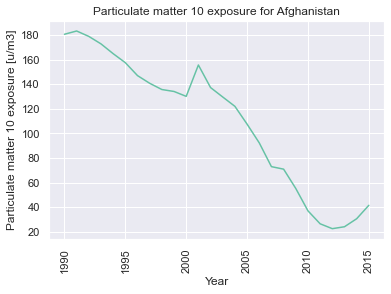

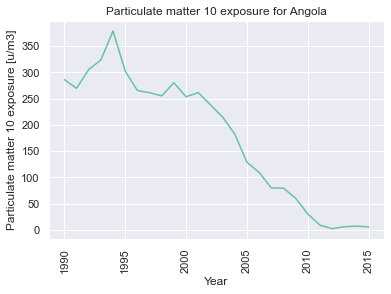

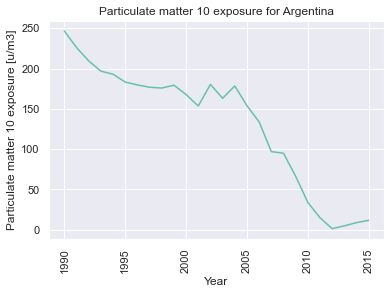

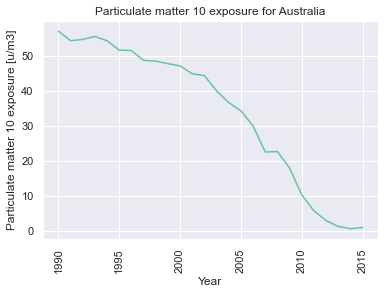

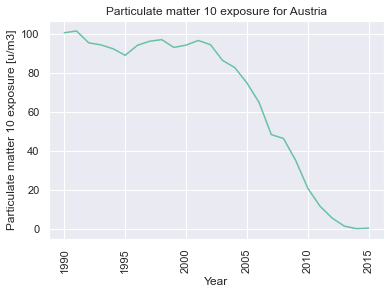

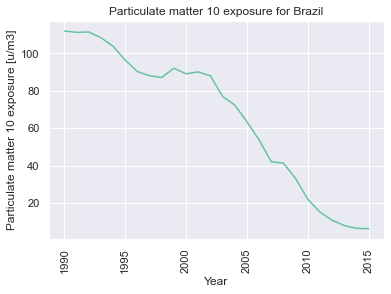

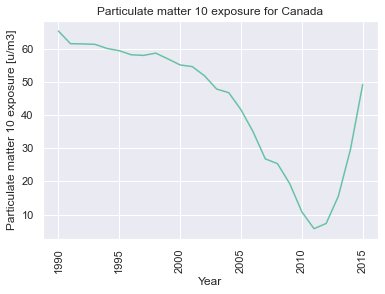

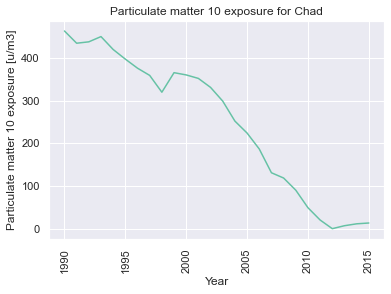

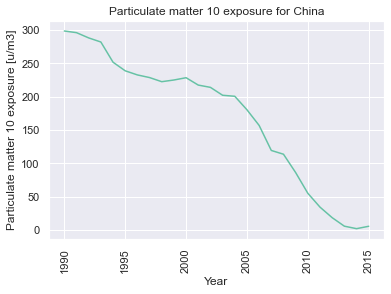

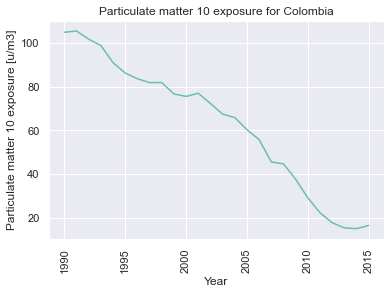

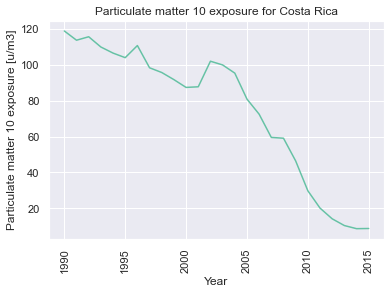

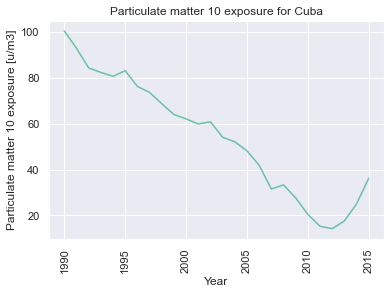

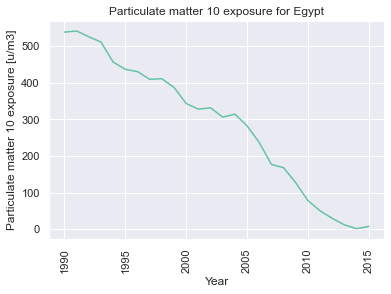

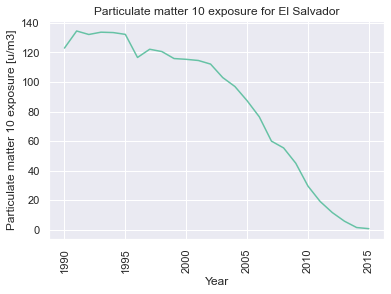

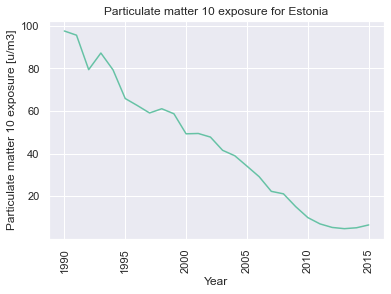

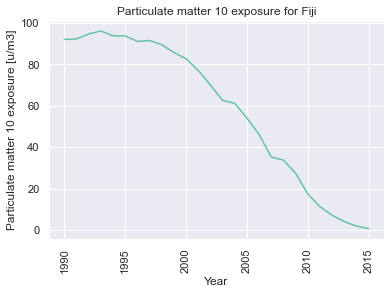

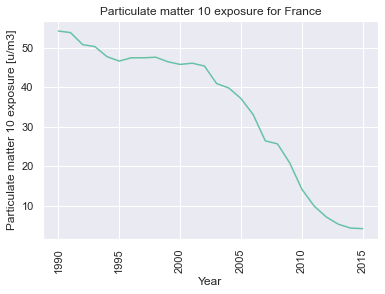

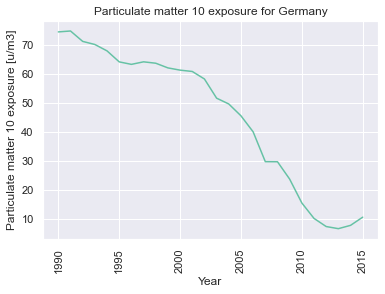

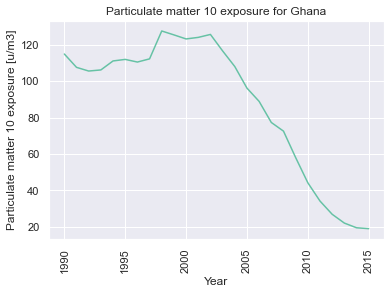

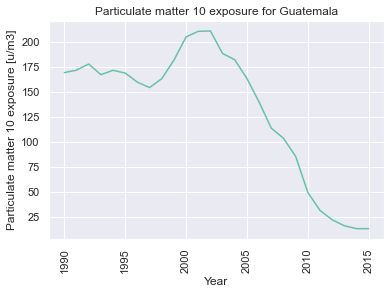

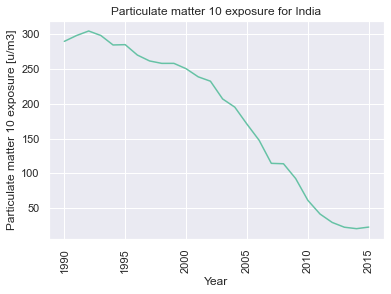

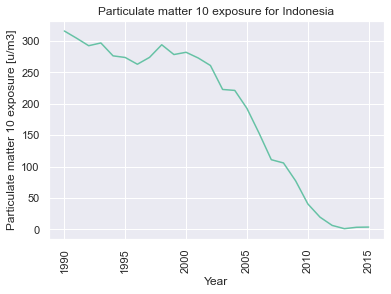

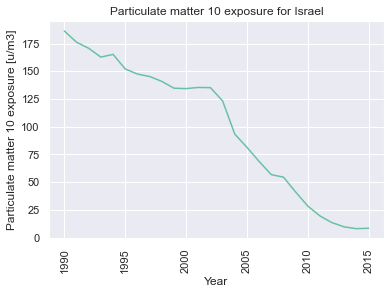

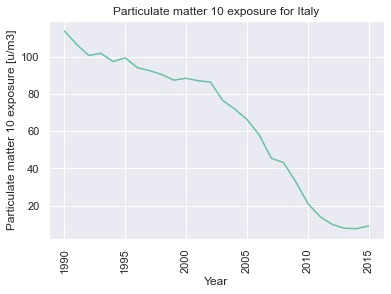

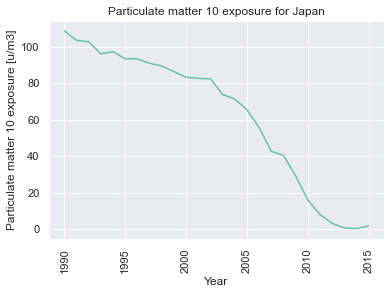

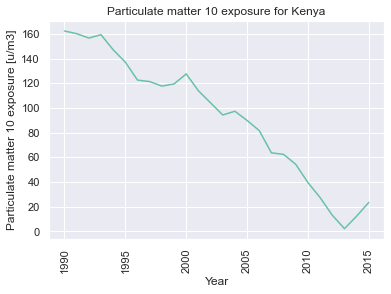

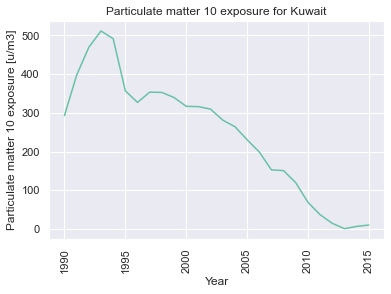

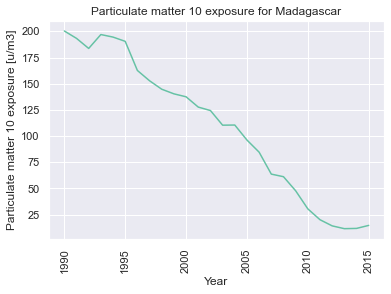

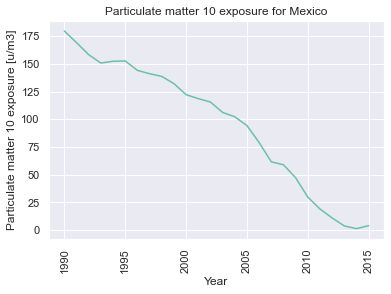

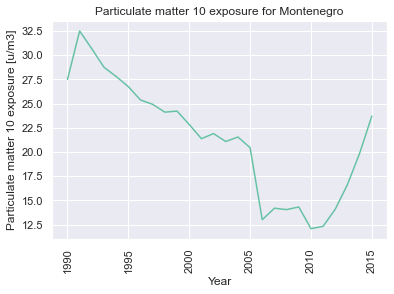

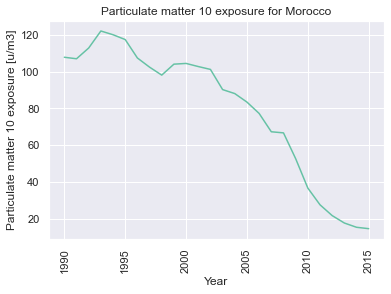

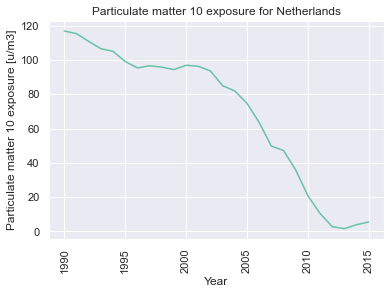

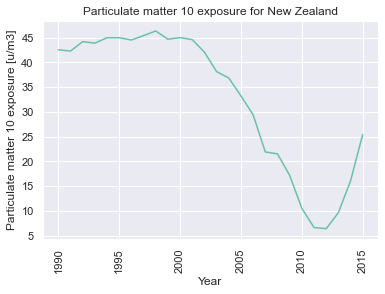

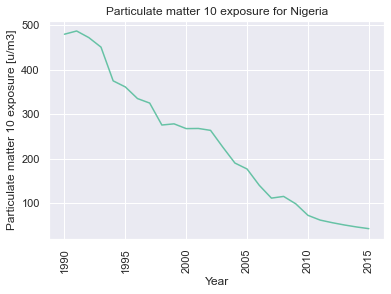

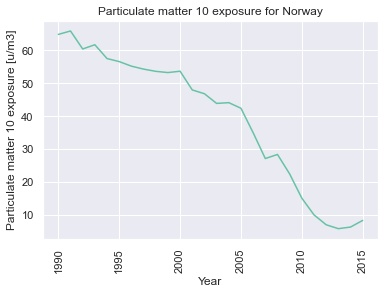

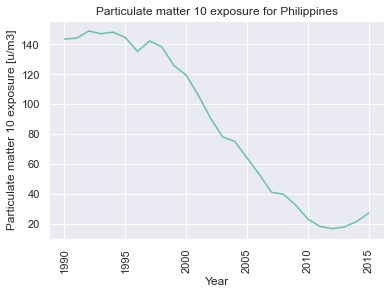

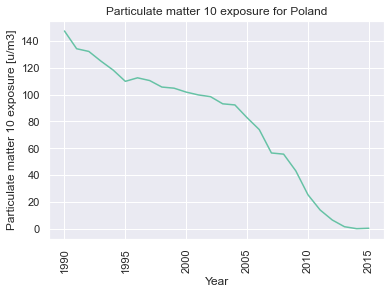

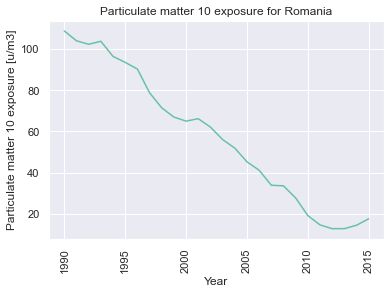

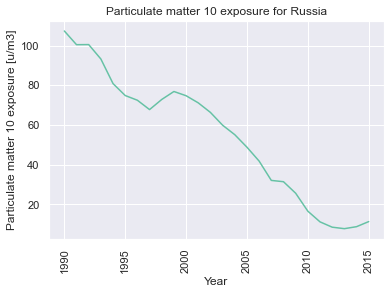

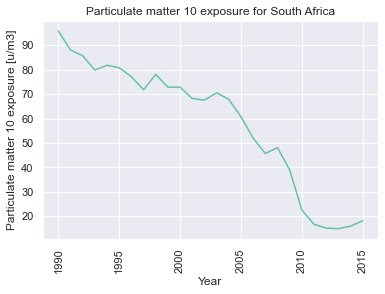

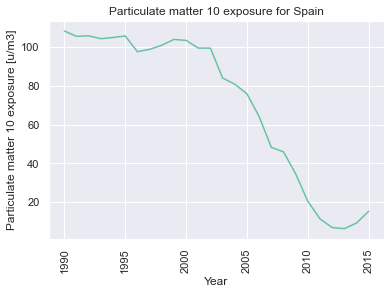

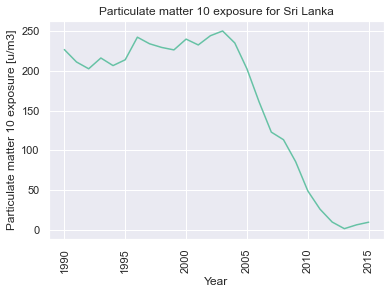

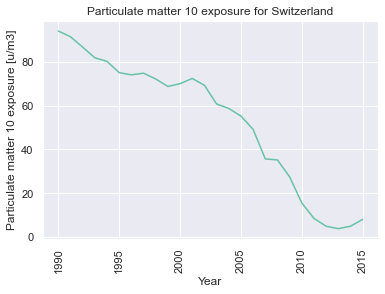

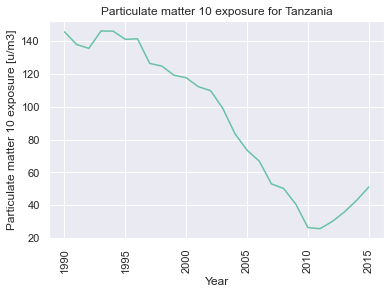

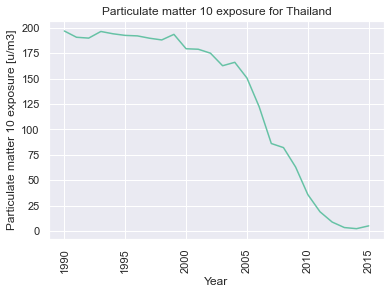

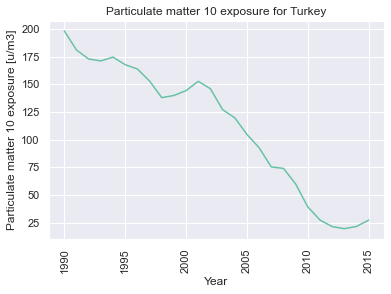

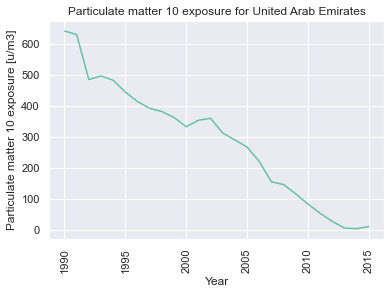

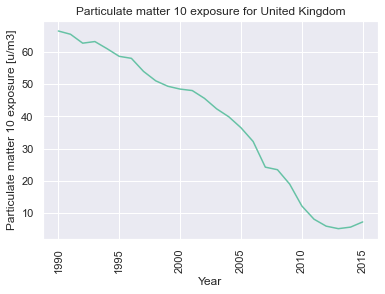

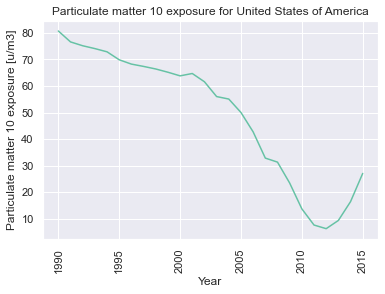

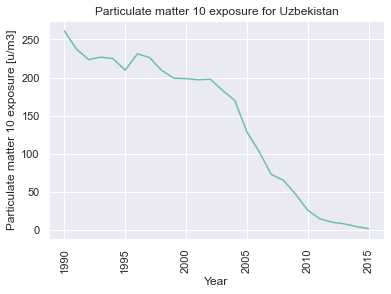

In [7]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['pm10.exp'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Particulate matter 10 exposure for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Particulate matter 10 exposure [u/m3]')
    #plt.legend()
    plt.show()

In [8]:
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

data["pm2.5.aqi"] = data["pm2.5.exp"].apply(lambda x: get_PM25_subindex(x))

In [9]:
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

data["pm10.aqi"] = data["pm10.exp"].apply(lambda x: get_PM10_subindex(x))

In [10]:
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

data["o3.aqi"] = data["o3.exp"].apply(lambda x: get_O3_subindex(x))

In [11]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

data["checks"] = (data["pm2.5.aqi"] > 0).astype(int) + \
                (data["pm10.aqi"] > 0).astype(int) + \
                (data["o3.aqi"] > 0).astype(int)

data["aqi"] = round(data[["pm2.5.aqi", "pm10.aqi", "o3.aqi"]].max(axis = 1))
data.loc[data["pm2.5.aqi"] + data["pm10.aqi"] <= 0, "aqi"] = np.NaN
data.loc[data.checks < 3, "aqi"] = np.NaN

data["aqi.bucket"] = data["aqi"].apply(lambda x: get_AQI_bucket(x))
data[~data.aqi.isna()].head().round(2)
data['aqi'] = data['aqi'].apply(lambda x: round(x, 0)).fillna(0).astype(float).astype(int)

In [12]:
aqi = pd.concat([data.iloc[:,0:2],data.iloc[:,-6:]],axis = 1).round(1)
d1=aqi.groupby(['year'])['aqi'].mean().reset_index(name='aqi').set_index('year')

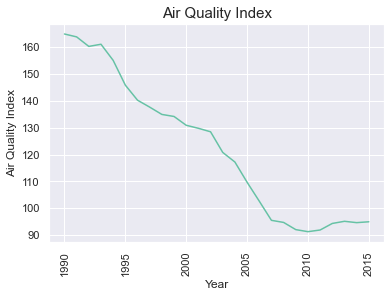

In [13]:
d1['aqi'].plot()
plt.xticks(rotation=90)
plt.title(f"Air Quality Index", size=15)
plt.xlabel('Year')
plt.ylabel('Air Quality Index')
plt.show()

In [ ]:
for _, d in data.set_index('year').groupby('country'):
    fig, ax = plt.subplots()
    d['aqi'].plot()
    plt.xticks(rotation=90)
    plt.title(f"Air Quality Index for {d['country'].iat[0]}")
    plt.xlabel('Year')
    plt.ylabel('Air Quality Index')
    #plt.legend()
    plt.show()

In [ ]:
aqi1990 = data.loc[data['year'] == 1990]
ax = sns.countplot(x = "aqi.bucket", data=aqi1990)
plt.title(f"Air Quality Index in 1990", size=15)
plt.xlabel('Air Quality Index')
plt.ylabel('Number of countries')

In [ ]:
aqi2015 = data.loc[data['year'] == 2015]
ax = sns.countplot(x = "aqi.bucket", data=aqi2015)
plt.title(f"Air Quality Index in 2015", size=15)
plt.xlabel('Air Quality Index')
plt.ylabel('Number of countries')

In [ ]:
sns.catplot(x="aqi.bucket", y="year", data=aqi)
plt.title(f"Air Quality Index", size=15)
plt.xlabel('Air Quality Index')
plt.ylabel('Year')

In [ ]:
conditions = [
    (data['aqi.bucket'] == 'Good'),
    (data['aqi.bucket'] == 'Satisfactory'),
    (data['aqi.bucket'] == 'Moderate'),
    (data['aqi.bucket'] == 'Poor'),
    (data['aqi.bucket'] == 'Very Poor'),
    (data['aqi.bucket'] == 'Severe')]

choices = ['Sustainable', 'Quite sustainable', 'Quite sustainable', 'Not sustainable', 'Not sustainable', 'Not sustainable']
data['sust.level.aqi'] = np.select(conditions, choices)
data.to_excel(r'air_pollution.xlsx')